In [1]:
# Libraries
import tensorflow as tf
from keras.datasets import cifar10
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import numpy as np

# Tensorflow aliases
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, SpatialDropout2D, BatchNormalization
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.utils import plot_model

(X_train, y_train),(X_test, y_test) = cifar10.load_data()

# Convert to float32 for scaling
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize data by scaling by max
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encode target labels and reshape
y_train = np_utils.to_categorical(y_train.transpose()).reshape(50000,10)
y_test = np_utils.to_categorical(y_test.transpose()).reshape(10000,10)
input_shape = (32,32,3)

print(f"Training set: {len(X_train)}\nTesting set: {len(X_test)}")

def build_cnn3(activation='relu', kernel_size=(3,3), pool_size=(2,2), regularizer=None, lam=0.01, summarize=False, dropout=False, drop_prob1=0.2, drop_prob2=0.2):
  model = Sequential()
  
  if regularizer == None:
    # Convolutional layers
    model.add(Conv2D(filters=32, kernel_size=kernel_size, activation=activation, input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size))
    model.add(Conv2D(filters=64, kernel_size=kernel_size, activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size))
    if dropout:
      model.add(SpatialDropout2D(drop_prob1))

    model.add(Conv2D(filters=128, kernel_size=kernel_size, activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size))
    if dropout:
      model.add(SpatialDropout2D(drop_prob2))

    # model.add(Conv2D(filters=256, kernel_size=kernel_size, activation=activation))
    # model.add(BatchNormalization())
    # if dropout:
    #   model.add(SpatialDropout2D(drop_prob2))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(512, activation=activation))
    if dropout:
      model.add(Dropout(drop_prob2))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    if summarize:
      model.build()
      model.summary()
    return model
  else:
    # Convolutional layers
    model.add(Conv2D(filters=32, kernel_size=kernel_size, kernel_regularizer=regularizer(lam), activation=activation, input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size))
    model.add(Conv2D(filters=64, kernel_size=kernel_size, kernel_regularizer=regularizer(lam), activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size))
    if dropout:
      model.add(SpatialDropout2D(drop_prob1))

    model.add(Conv2D(filters=128, kernel_size=kernel_size, kernel_regularizer=regularizer(lam), activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size))
    if dropout:
      model.add(SpatialDropout2D(drop_prob2))

    # model.add(Conv2D(filters=256, kernel_size=kernel_size, activation=activation))
    # model.add(BatchNormalization())
    # if dropout:
    #   model.add(SpatialDropout2D(drop_prob2))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(512, activation=activation, kernel_regularizer=regularizer(lam)))
    if dropout:
      model.add(Dropout(drop_prob2))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    if summarize:
      model.build()
      model.summary()
    return model

# Helper functions
def show_acc(h, e):
  plt.plot(range(e), h.history['accuracy'], label='Training')
  plt.plot(range(e), h.history['val_accuracy'], label='Validation')
  plt.ylim([0, 1])
  plt.legend()
  plt.show()
  
def build_and_plot3(activation='relu', kernel_size=(3,3), pool_size=(2,2), regularizer=None, lam=0.01, dropout=False, drop_prob1=0.2, drop_prob2=0.2, summarize=False, e=100, verbose=0):
  model = build_cnn3(activation=activation, kernel_size=kernel_size, pool_size=pool_size, regularizer=regularizer, lam=lam, dropout=dropout, drop_prob1=drop_prob1, drop_prob2=drop_prob2, summarize=summarize)
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=e, verbose=verbose)
  show_acc(history, e)
  print("Max accuracy: ", np.max(history.history['accuracy']))
  print("Min accuracy: ", np.min(history.history['accuracy']))
  print("Test performance ", model.evaluate(X_test, y_test))
  return model, history

Training set: 50000
Testing set: 10000


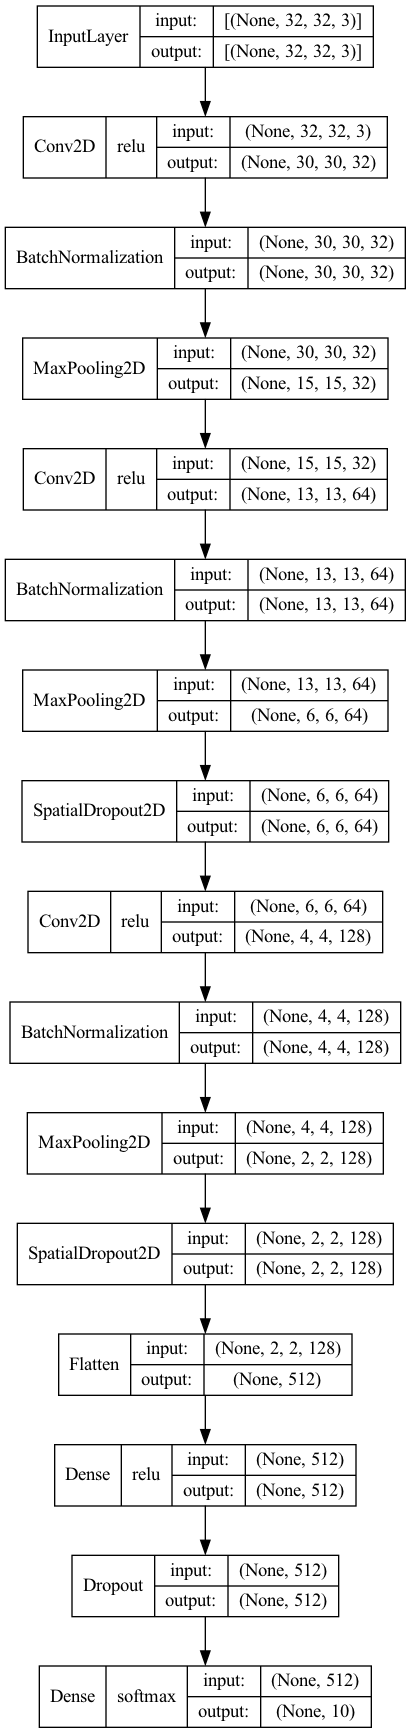

In [2]:
# Best: build_and_plot3(regularizer=l2, lam=0.00001, dropout=True, drop_prob1=0.2, drop_prob2=0.2, e=100)
bestModel = build_cnn3(regularizer=l2, lam=0.00001, dropout=True, drop_prob1=0.2, drop_prob2=0.2)
plot_model(bestModel, show_layer_names=False, show_shapes=True, show_layer_activations=True)